#01. Import data and libraries

In [2]:
# Import libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
# Creating path

path = r'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_4/Instacart Basket Analysis'

In [4]:
path

'/Users/kristincpeterson/Desktop/DataAnalytics/Achievement_4/Instacart Basket Analysis'

In [5]:
ords_prods_merge = pd.read_pickle(os.path.join(path, '02_Data', 'Prepared_Data', 'orders_products_merged_loyalty_flags.pkl'))

In [6]:
ords_prods_merge.shape

(32434212, 17)

In [7]:
ords_prods_merge.head()

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,busiest_days,busiest_period_of_day
0,1,Chocolate Sandwich Cookies,61,19,5.8,3139998,138,prior,28,6,11,3.0,5,0,Regularly busy,Regularly busy days,Most orders
1,1,Chocolate Sandwich Cookies,61,19,5.8,1977647,138,prior,30,6,17,20.0,1,1,Regularly busy,Regularly busy days,Average orders
2,1,Chocolate Sandwich Cookies,61,19,5.8,389851,709,prior,2,0,21,6.0,20,0,Busiest day,Busiest days,Average orders
3,1,Chocolate Sandwich Cookies,61,19,5.8,652770,764,prior,1,3,13,NaN,10,0,Regularly busy,Least busy days,Most orders
4,1,Chocolate Sandwich Cookies,61,19,5.8,1813452,764,prior,3,4,17,9.0,11,1,Least busy,Least busy days,Average orders


### Creating Bar Charts

<Axes: xlabel='order_day_of_week'>

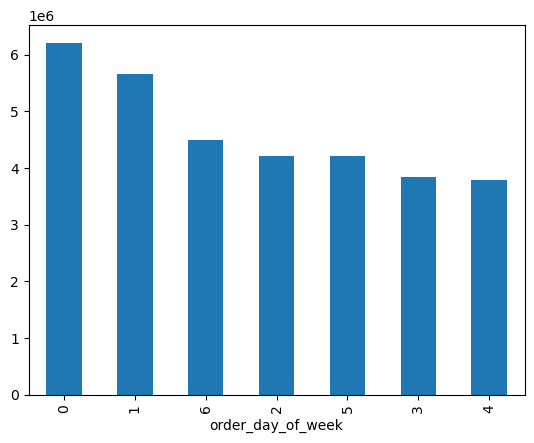

In [9]:
# Create a bar chart

ords_prods_merge['order_day_of_week'].value_counts().plot.bar()

<Axes: xlabel='order_day_of_week'>

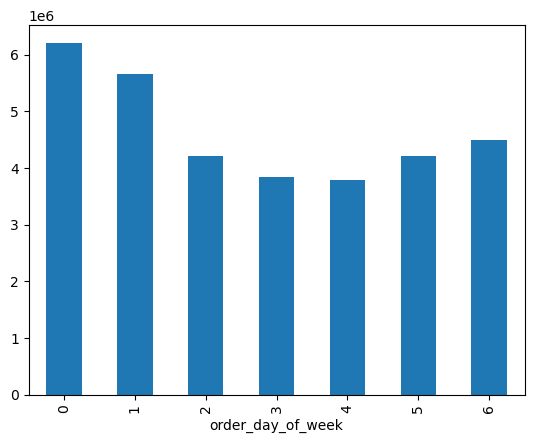

In [10]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index().plot.bar()

In [11]:
# Print frequencies

ords_prods_merge['order_day_of_week'].value_counts()

order_day_of_week
0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: count, dtype: int64

In [12]:
ords_prods_merge['order_day_of_week'].value_counts().sort_index()

order_day_of_week
0    6209632
1    5665830
2    4217766
3    3844096
4    3787193
5    4209449
6    4500246
Name: count, dtype: int64

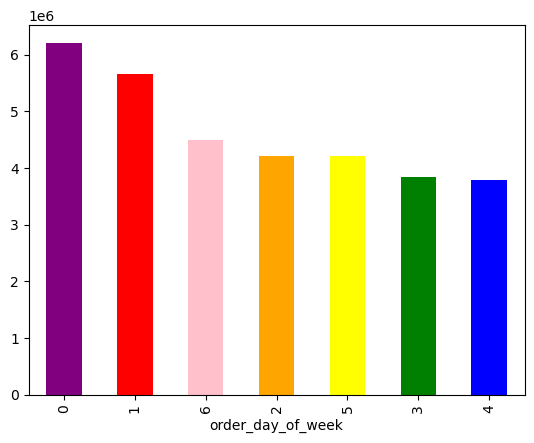

In [13]:
# Add color to bar chart

bar = ords_prods_merge['order_day_of_week'].value_counts().plot.bar(color =['purple', 'red', 'pink', 'orange', 'yellow', 'green', 'blue'])

### Exporting Charts

In [14]:
# Export chart outside of Jupyter in the form of an image file

bar.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'bar_orders_dow.png'))

### Creating Histograms & Scatterplots

<Axes: ylabel='Frequency'>

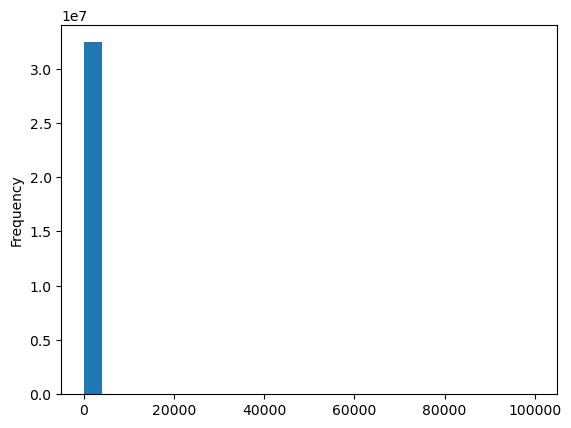

In [15]:
# Create a histogram of the "prices" column

ords_prods_merge['prices'].plot.hist(bins = 25)

In [16]:
ords_prods_merge['prices'].describe()

count    3.243421e+07
mean     1.198114e+01
std      4.954311e+02
min      1.000000e+00
25%      4.200000e+00
50%      7.400000e+00
75%      1.130000e+01
max      9.999900e+04
Name: prices, dtype: float64

In [17]:
ords_prods_merge['prices'].mean()

11.981143922966337

In [18]:
ords_prods_merge['prices'].median()

7.4

In [19]:
ords_prods_merge['prices'].max()

99999.0

<Axes: xlabel='prices', ylabel='prices'>

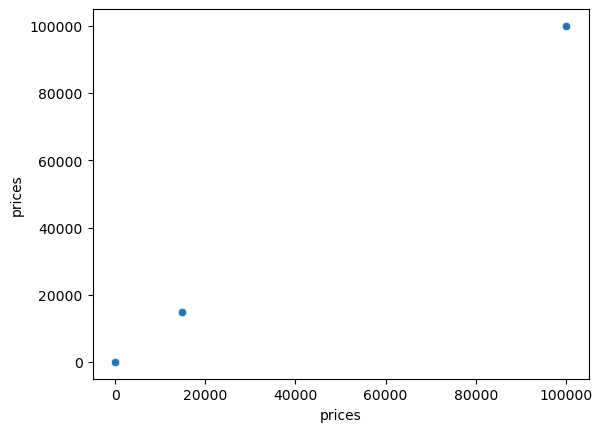

In [21]:
# Create a scatterplot

sns.scatterplot(x = 'prices', y = 'prices', data = ords_prods_merge)

In [22]:
# Determine whether there are any values above $100 threshold

ords_prods_merge.loc[ords_prods_merge['prices'] > 100]

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,eval_set,order_number,order_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,busiest_day,busiest_days,busiest_period_of_day
13128379,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,912404,17,prior,12,2,14,5.0,5,0,Regularly busy,Regularly busy days,Most orders
13128380,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,603376,17,prior,22,6,16,4.0,3,1,Regularly busy,Regularly busy days,Most orders
13128381,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,3264360,135,prior,2,2,21,13.0,6,0,Regularly busy,Regularly busy days,Average orders
13128382,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,892534,135,prior,3,0,8,12.0,3,1,Busiest day,Busiest days,Average orders
13128383,21553,Lowfat 2% Milkfat Cottage Cheese,108,16,14900.0,229704,342,prior,8,1,19,30.0,9,0,Regularly busy,Busiest days,Average orders
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21815122,33664,2 % Reduced Fat Milk,84,16,99999.0,2249946,204099,prior,29,0,8,4.0,1,0,Busiest day,Busiest days,Average orders
21815123,33664,2 % Reduced Fat Milk,84,16,99999.0,2363282,204099,prior,31,0,9,2.0,1,1,Busiest day,Busiest days,Most orders
21815124,33664,2 % Reduced Fat Milk,84,16,99999.0,3181945,204395,prior,13,3,15,8.0,25,0,Regularly busy,Least busy days,Most orders
21815125,33664,2 % Reduced Fat Milk,84,16,99999.0,2486215,205227,prior,7,3,20,4.0,8,0,Regularly busy,Least busy days,Average orders


In [23]:
# Mark outliers as missing since they don't make sense in terms of other values in the column

ords_prods_merge.loc[ords_prods_merge['prices'] >100, 'prices'] = np.nan

In [24]:
ords_prods_merge['prices'].max()

25.0

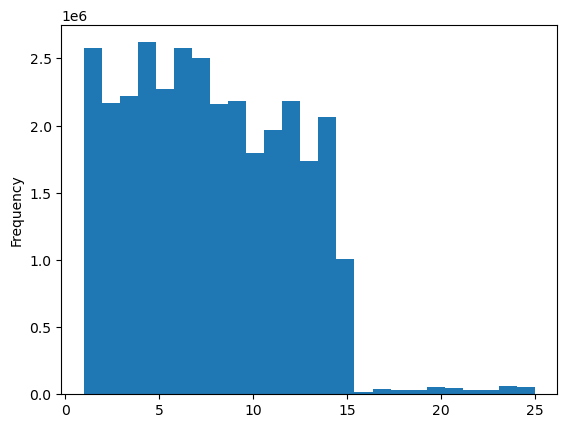

In [25]:
# Updated histogram with cleaned "prices" column

hist = ords_prods_merge['prices'].plot.hist(bins = 25)

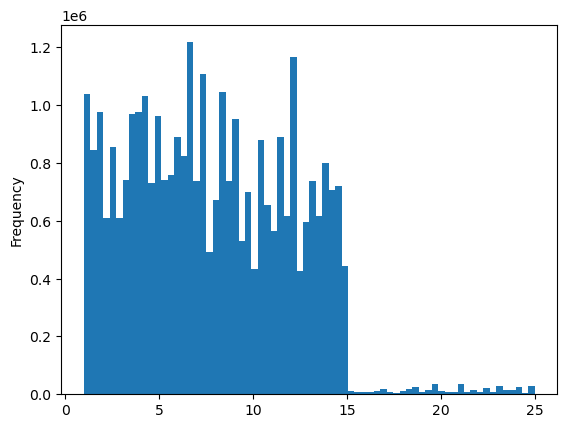

In [26]:
# Increase granularity in the histogram to 70 bins

hist_2 = ords_prods_merge['prices'].plot.hist(bins = 70)

In [27]:
# Export chart outside of Jupyter in the form of an image file

hist.figure.savefig(os.path.join(path, '04_Analysis','Visualizations', 'hist_orders_dow.png'))

### Creating Line Charts

In [28]:
# Create a sample (70% of dataset)

np.random.seed(4)
dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [29]:
dev

array([False,  True, False, ..., False,  True,  True])

In [30]:
np.random.rand(10)

array([0.16891835, 0.04368635, 0.41602642, 0.88973306, 0.66299301,
       0.78345326, 0.02169353, 0.79078115, 0.45980038, 0.17173956])

In [31]:
# Create a list holding True/False values to the test np.random.rant() <= 0.7

dev = np.random.rand(len(ords_prods_merge)) <= 0.7

In [32]:
# Store 70% of the sample in the dataframe big

big = ords_prods_merge[dev]

In [33]:
# Store 30% of the sample in the dataframe small

small = ords_prods_merge[~dev]

In [34]:
len(ords_prods_merge)

32434212

In [35]:
len(big) + len(small)

32434212

In [36]:
df_2 = small[['order_day_of_week', 'prices']]

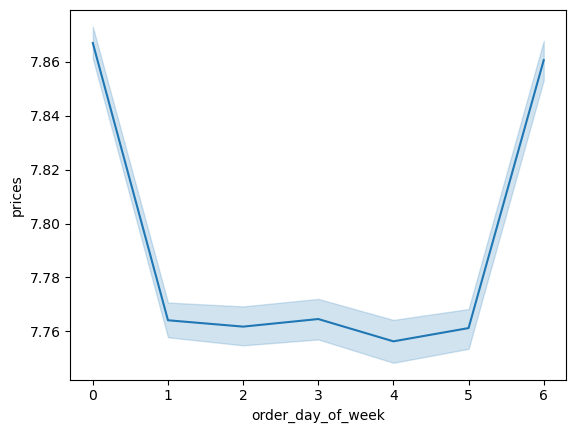

In [37]:
# Create line chart

line = sns.lineplot(data = df_2, x = 'order_day_of_week', y = 'prices')